<font size="9">MTH 484 - UQ - Homework 2</font>

Answer the following questions inside this Julia Notebook, using either mathematical typesetting or julia code as necessary.

Due date: 9/20/19

---

## Problem 1
Use rejection sampling as discussed in class to obtain 10,000 samples from the following joint PDF:


$$ f(x,y) = \begin{cases} 
      \frac{1}{8\pi^2}\left[ \sin(x) + \cos(y) + 2\right] & \begin{matrix}-\pi \leq x\leq \pi\\ -\pi \leq y\leq \pi \end{matrix} \\
      0 & else 
   \end{cases} $$


and has the following contour shape:
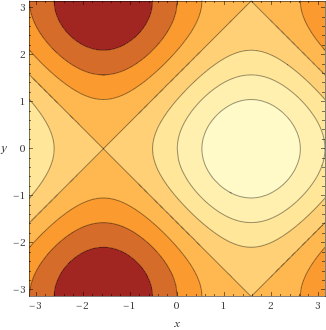

Use your samples to construct a 2d histogram or heatmap.

In [1]:
using Plots; gr();
f_xy(x,y)=(1/8π^2)*(sin(x)+cos(y)+2)

f_xy (generic function with 1 method)

In [2]:
x_vec = -π:0.1:π
y_vec = -π:0.1:π
z_mat = zeros(length(x_vec),length(y_vec))
for i=1:length(x_vec), j=1:length(y_vec)
    z_mat[i,j] = f_xy(x_vec[i],y_vec[j])
end
# z_mat

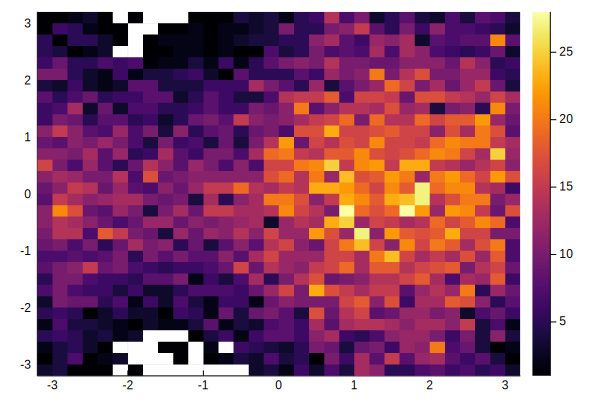

In [3]:
# surface(x_vec,y_vec, z_mat)
g_xy(x,y)=1
c=1
N = 10000
x_sample = Float64[]
y_sample = Float64[]
# for i = 1:N
# while length(x_sample)<100000
while length(x_sample)<10000
    x = rand(-π:0.0001:π)[1]
    y = rand(-π:0.0001:π)[1]
    λ =  rand(1)[1]
    if λ * c*g_xy(x,y) < f_xy(x,y)
        push!(x_sample,x)
        push!(y_sample,y)
    end
end
# print(length(x_sample)) ##need 10000 x_sample? ->while loop 
histogram2d(x_sample,y_sample, bins=30)

## Problem 2

Let us suppose that two populations of bacteria, $R$ and $S$, are competing for a shared resource.  Exposure to this resource helps both species grow, but at potentially different rates.  We can further assume that individually the species will grow logistically, implying the rate of increase can be written as $r x(L - x)$, where $r$ is the maximum possible rate of growth, $L$ is the carrying capacity(環境収容力), and $x$ is the current population size.  Because the species are competing, an interaction term is necessary.  For simplicty, we can assume that the competition is strictly detrimental(有害な) to growth (but at different severities) and is proportional to(に比例) the product of the population sizes.

Given the above, write down an ODE model for the $R$ and $S$ populations as a function of time $t$.  Note, you should have one equation for each species, with clearly identified parameters in each.  Describe the meaning of the terms and parameters that appear in the model.


$\dfrac{d}{dt}R(t) = r_1R(t)(L_1-R(t)) - k_1R(t)S(t)$

$\dfrac{d}{dt}S(t) = r_2S(t)(L_2-S(t)) - k_2R(t)S(t)$

Where $r_1, r_2$ are parameters of the maximum possible rate of growth for each of R and S, $L_1, L_2$
are parameters of the carrying capacity and $k_1, k_2$ are parameters of competition determining how much each of populations of R and S
decreases by competition.Therefore, $k_1R(t)S(t)$ and $k_2R(t)S(t)$ are competition terms, and from our assumption,
$r_1R(t)(L_1-R(t))$ and $r_2R(t)(L_2-R(t))$ are terms for the rate of increase 


## Problem 3

Using Julia, implement your model.  Describe the different qualitative behaviors possible for your model solutions (hint: there should be two main ones) as determined by your parameters.

In [23]:
using DifferentialEquations, ParameterizedFunctions;

In [24]:
X = @ode_def begin
    dR = r_1*R*(L_1-R)-k_1*R*S
    dS = r_2*S*(L_2-S)-k_2*R*S
    end r_1 r_2 L_1 L_2 k_1 k_2

#375 (generic function with 2 methods)

In [25]:
R_S = [500.0,20.0]
tspan = (0.0,0.015)
params = [0.5,0.5,10000,4000, 0.3, 0.1]
prob = ODEProblem(X,R_S,tspan, params)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 0.015)
u0: [500.0, 20.0]

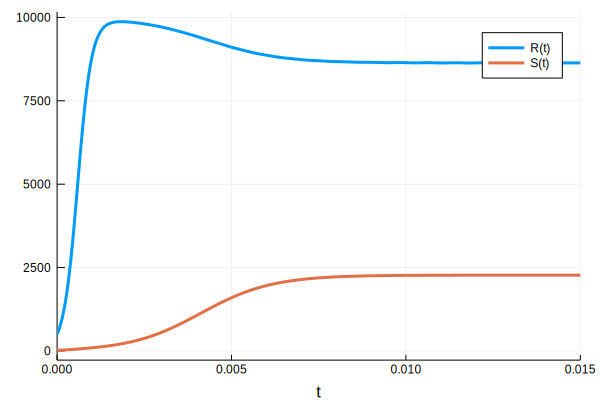

In [26]:
sol = solve(prob)
sol.(tspan[2])
plot(sol)

##Case:1 The population of bacteria R goes extinct while the population of bacteria S get closer and closer to its carrying capacity.
##Case:2 The population of bacteria S goes extinct while the population of bacteria R get closer and closer to its carrying capacity.
##Case:3 The population of each bacteria gets closer to some numbers other than 0 or its carrying capacity, making the system equillibrium state. 



Case:1 The population of bacteria R goes extinct while the population of bacteria S get closer and closer to its carrying capacity.


Case:2 The population of bacteria S goes extinct while the population of bacteria R get closer and closer to its carrying capacity.


Case:3 The population of each bacteria gets closer to some numbers other than 0 or its carrying capacity, making the system equillibrium state.

## Problem 4

Write a function to compute the equilibrium state for your model (this will be our Quantity of Interest).  Note, this should be relatively straight-forward, so don't do anything too sophisticated.  Then, describe and make plots showing the relationship between individidual model parameters (choose 3 different ones) and your QoI.

In [27]:
function eq_state(x)
     return x.(tspan[2])
end
eq_state(sol)
###just taking a large enough t that is the end of tspan and return the value of R(t) and S(t) 
### R(t) is getting closer to the value of deriv(x)[1] that is 8637, S(t) is getting closer to the 
### value of deriv(x)[2] that is 2273, and these values make the system with the parameters I used equilibrium



2-element Array{Float64,1}:
 8636.88044568805
 2272.70882434795

In [28]:
# Change the maximum possible rate of growth for R
prob.p[1] = 0.5
prob.p[2] = 0.5
prob.p[3] = 10000
prob.p[4] = 4000
prob.p[5] = 0.3
prob.p[6] = 0.1
param_vec = 0.0:0.1:5.0
qoi_vec = zeros(length(param_vec),2)
for i in 1:length(param_vec)
    prob.p[1] = param_vec[i]
    sol = solve(prob)
    qoi_vec[i,:] = eq_state(sol)
end

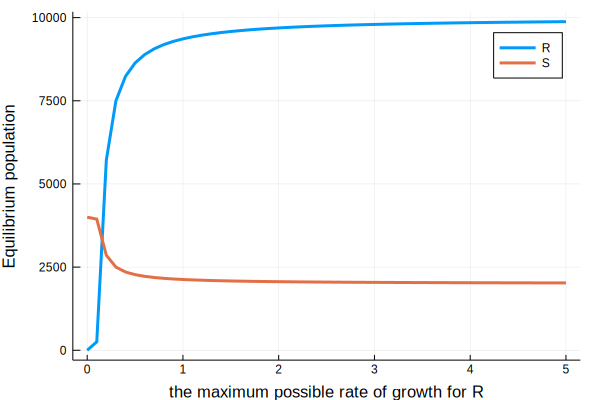

In [29]:
plot(param_vec, qoi_vec, linewidth = 3, xlabel="the maximum possible rate of growth for R", ylabel="Equilibrium population", label=["R","S"])

Until around the maximum possible rate of growth for R of 0.5, as it increases,the population of R at at the equiliburium state dramatically increases while the population of S at at the equiliburium state dramatically decreases. After that, the rate of changes for each populations become gradual. Eventually, the population of R reaches its carrying capacity of 10000, and the population of S converges around 2300, but it looks slitely decreasing, too.  

In [30]:
# Change competition constant for R
prob.p[1] = 0.5
prob.p[2] = 0.5
prob.p[3] = 10000
prob.p[4] = 4000
prob.p[5] = 0.3
prob.p[6] = 0.1
param_vec = 0.0:0.1:10.0
qoi_vec = zeros(length(param_vec),2)
for i in 1:length(param_vec)
    prob.p[5] = param_vec[i]
    sol = solve(prob)
    qoi_vec[i,:] = eq_state(sol)
end

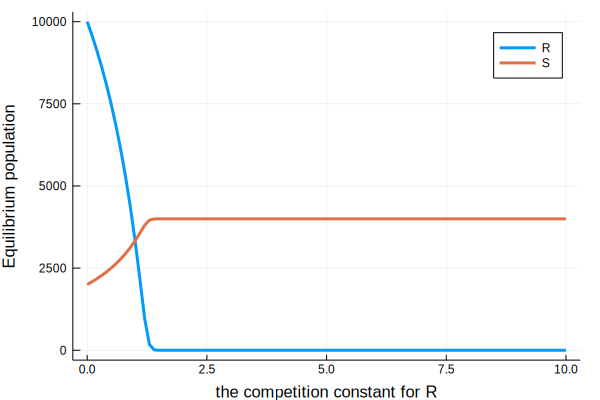

In [31]:
plot(param_vec, qoi_vec, linewidth = 3, xlabel="the competition constant for R", ylabel="Equilibrium population", label=["R","S"])

As the competition constant for R, increases, the population of R at the equilibrium state keeps decreasing until it goes extinct at around 1.5, and the population of S at the equilibrium state keeps increasing until it reaches its carrying capaity of 4000 also at around 1.5. 

In [34]:
# Change carrying capacity of R
prob.p[1] = 0.5
prob.p[2] = 0.5
prob.p[3] = 10000
prob.p[4] = 4000
prob.p[5] = 0.3
prob.p[6] = 0.1
param_vec = 0.0:500:23000
qoi_vec = zeros(length(param_vec),2)
for i in 1:length(param_vec)
    prob.p[3] = param_vec[i]
    sol = solve(prob)
    qoi_vec[i,:] = eq_state(sol)
end

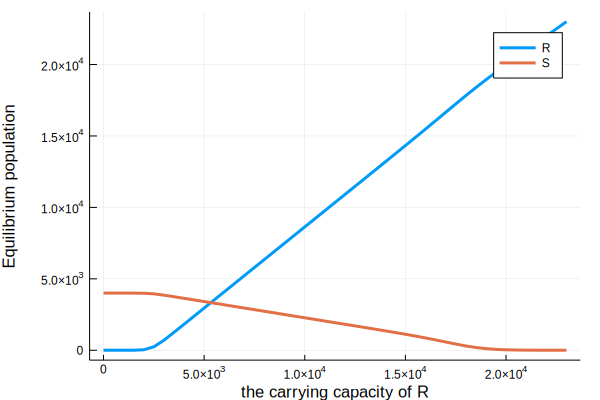

In [35]:
plot(param_vec, qoi_vec, linewidth = 3, xlabel="the carrying capacity of R", ylabel="Equilibrium population", label=["R","S"])

At first,each of the populations at the equilibrium state is not affected by the increase of the carrying capacity of R. However, the populations begin to be affected by the increase of the carrying capacity of R from a certain point (around 2500) at a constant rate (straight lines). S keeps decreasing, R keeps increasing, and they cross each other that reverses the populations at equilibrium state at around 5000. Then, S ends up going extinct at around the moment at which the carrying capacity of R gets 20000 while the population of R at equilibrium the state keeps increasing since carrying capacity of R also keeps increasing. 